In [1]:
from preamble import *
interactive = True # Set to True for interactive plots
if interactive:
    fig_scale = 1.5
else: # For printing
    fig_scale = 0.3
    plt.rcParams.update(print_config)

It appears that you are using a Jupyter Notebook or Jupyter Lab environment to create interactive visualizations of various classifiers using the scikit-learn library (sklearn) and the mglearn library. The code you provided aims to create a synthetic dataset, train several classifiers (Logistic Regression, Support Vector Machine, and k-Nearest Neighbors), and then use ipywidgets and matplotlib for interactive plotting.

In [5]:
# Predict a class label (category), discrete and unordered
# Can be binary (e.g. spam/not spam) or multi-class (e.g. letter recognition)
# Many classifiers can return a confidence per class
# The predictions of the model yield a decision boundary separating the classes

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import make_moons
import ipywidgets as widgets
from ipywidgets import interact, interact_manual
import matplotlib.pyplot as plt
import mglearn


# create a synthetic dataset
X1, y1 = make_moons(n_samples=70, noise=0.2, random_state=8)

# Train classifiers
lr = LogisticRegression().fit(X1, y1)
svm = SVC(kernel='rbf', gamma=2, probability=True).fit(X1, y1)
knn = KNeighborsClassifier(n_neighbors=3).fit(X1, y1)

# Plotting
@interact
def plot_classifier(classifier=[lr,svm,knn]):  
    fig, axes = plt.subplots(1, 2, figsize=(12*fig_scale, 4*fig_scale))
    mglearn.tools.plot_2d_separator(
        classifier, X1, ax=axes[0], alpha=.4, cm=mglearn.cm2)
    scores_image = mglearn.tools.plot_2d_scores(
        classifier, X1, ax=axes[1], alpha=.5, cm=mglearn.ReBl, function='predict_proba')
    for ax in axes:
        mglearn.discrete_scatter(X1[:, 0], X1[:, 1], y1,
                                 markers='.', ax=ax)
        ax.set_xlabel("Feature 0")
        ax.set_ylabel("Feature 1", labelpad=0)
        ax.tick_params(axis='y', pad=0)

    cbar = plt.colorbar(scores_image, ax=axes.tolist())
    cbar.set_label('Predicted probability', rotation=270, labelpad=6)
    cbar.set_alpha(1)
    cbar.draw_all() 
    axes[0].legend(["Class 0", "Class 1"], ncol=4, loc=(.1, 1.1));

interactive(children=(Dropdown(description='classifier', options=(LogisticRegression(), SVC(gamma=2, probabili…

In [6]:
if not interactive:
    plot_classifier(classifier=svm)

In [7]:
@interact(x=(0, 10), y=(0, 10))
def add_numbers(x, y):
    return x + y


interactive(children=(IntSlider(value=5, description='x', max=10), IntSlider(value=5, description='y', max=10)…

In [11]:
from mglearn.datasets import make_wave
from mglearn.plot_helpers import cm2
from sklearn.linear_model import LinearRegression, BayesianRidge
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF
import numpy as np
X2, y2 = make_wave(n_samples=60)
x = np.atleast_2d(np.linspace(-3, 3, 100)).T
lr = LinearRegression().fit(X2, y2)
ridge = BayesianRidge().fit(X2, y2)
gp = GaussianProcessRegressor(kernel=RBF(10, (1e-2, 1e2)), n_restarts_optimizer=9, alpha=0.1, normalize_y=True).fit(X2, y2)

@interact
def plot_regression(regressor=[lr, ridge, gp]):
    line = np.linspace(-3, 3, 100).reshape(-1, 1)
    plt.figure(figsize=(5*fig_scale, 5*fig_scale))
    plt.plot(X2, y2, 'o', c=cm2(0))
    if(regressor.__class__.__name__ == 'LinearRegression'):
        y_pred = regressor.predict(x)
    else:
        y_pred, sigma = regressor.predict(x, return_std=True)
        plt.fill(np.concatenate([x, x[::-1]]),
             np.concatenate([y_pred - 1.9600 * sigma,
                            (y_pred + 1.9600 * sigma)[::-1]]),
             alpha=.5, fc='b', ec='None', label='95% confidence interval')
        
    plt.plot(line, y_pred, 'b-')
    plt.xlabel("Input feature 1")
    plt.ylabel("Target")

    if not interactive:
        plot_regression(regressor=gp)

interactive(children=(Dropdown(description='regressor', options=(LinearRegression(), BayesianRidge(), Gaussian…

Unsupervised Machine Learning

Unlabeled data, or data with unknown structure
Explore the structure of the data to extract information
Many types, we’ll just discuss two.

1. Clustering

Organize information into meaningful subgroups (clusters)
Objects in cluster share certain degree of similarity (and dissimilarity to other clusters)
Example: distinguish different types of customers



In [14]:
# Note: the most recent versions of numpy seem to cause problems for KMeans
# Uninstalling and installing the latest version of threadpoolctl fixes this

from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs

nr_samples = 1500

@interact
def plot_clusters(randomize=(1,100,1)):
    # Generate data
    X, y = make_blobs(n_samples=nr_samples, cluster_std=[1.0, 1.5, 0.5], random_state=randomize)
    # Cluster
    y_pred = KMeans(n_clusters=3, random_state=randomize).fit_predict(X)
    # PLot
    plt.figure(figsize=(5*fig_scale, 5*fig_scale))
    plt.scatter(X[:, 0], X[:, 1], c=y_pred)
    plt.title("KMeans Clusters")
    plt.xlabel("Feature 0")
    plt.ylabel("Feature 1")

    if not interactive:
        plot_clusters(randomize=2)

interactive(children=(IntSlider(value=50, description='randomize', min=1), Output()), _dom_classes=('widget-in…

2. Dimensionality reduction#

Data can be very high-dimensional and difficult to understand, learn from, store,…
Dimensionality reduction can compress the data into fewer dimensions, while retaining most of the information
Contrary to feature selection, the new features lose their (original) meaning
The new representation can be a lot easier to model (and visualize)

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


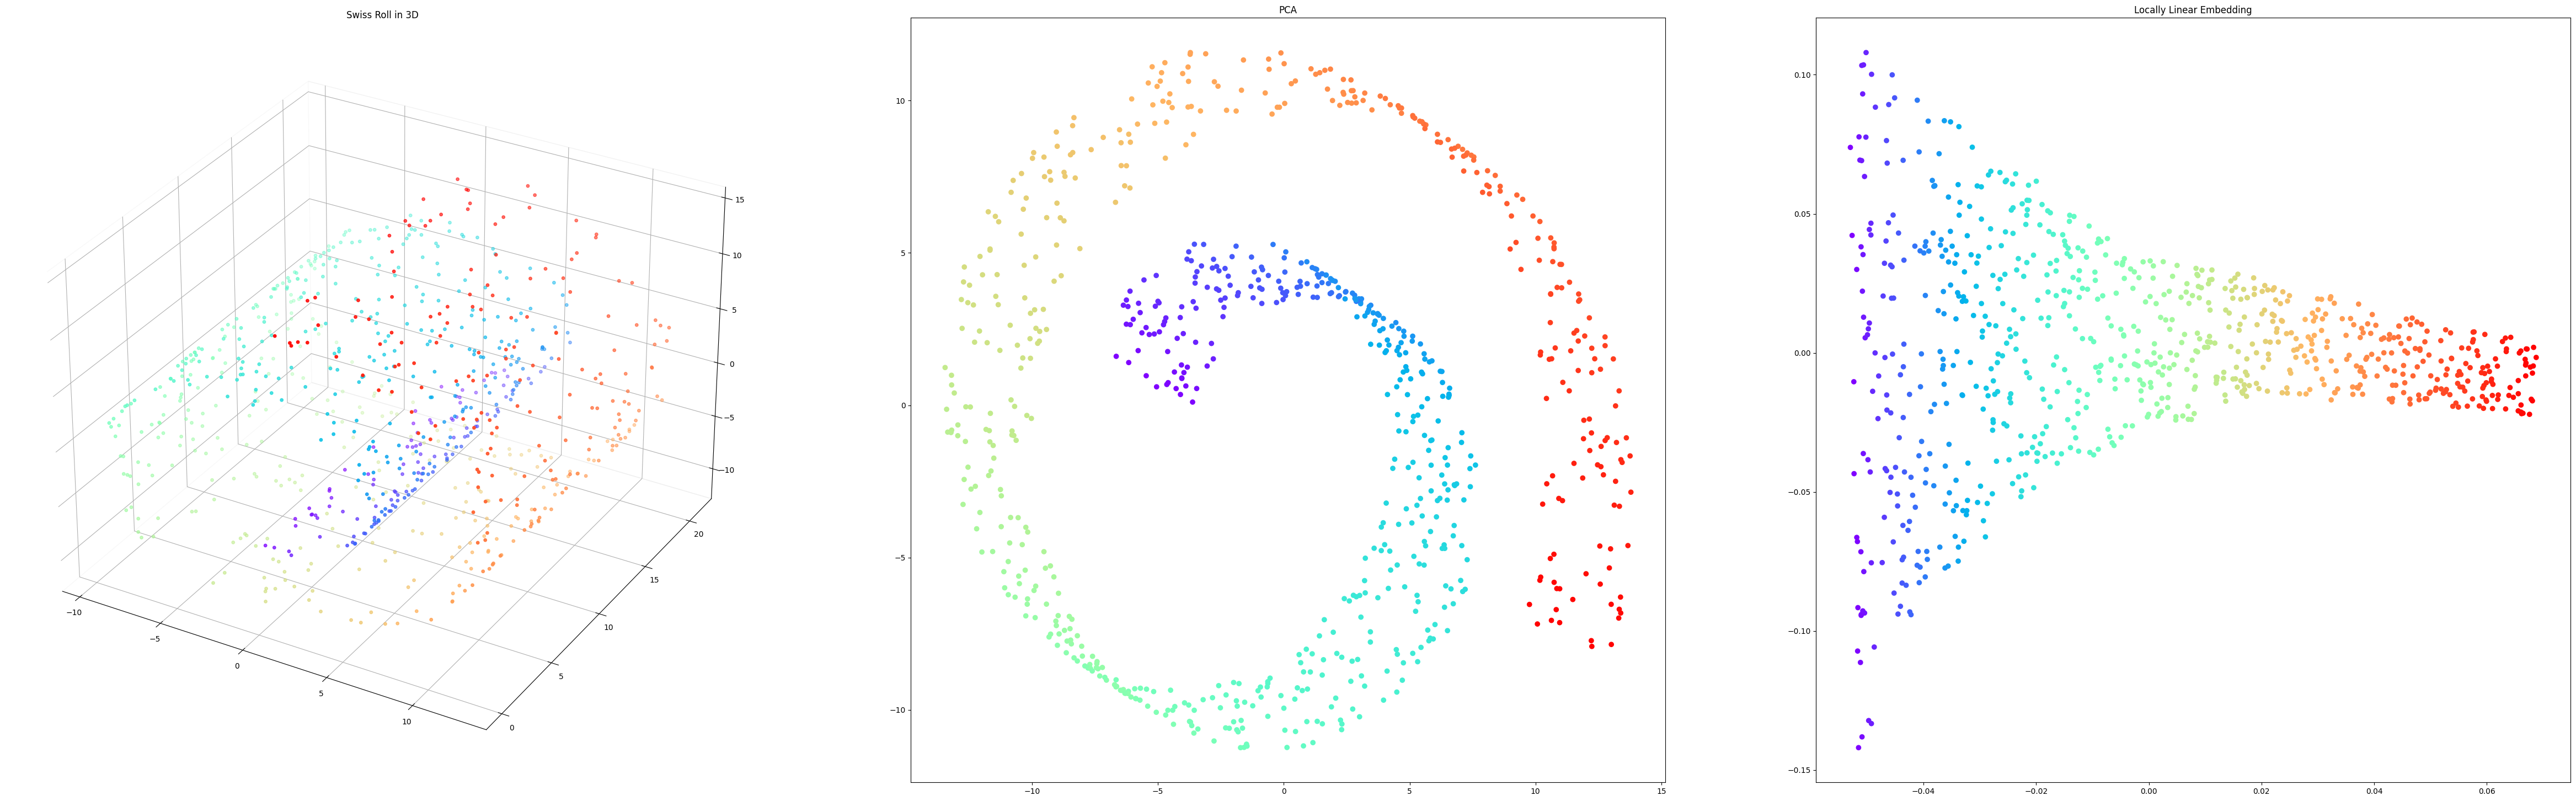

In [15]:
from sklearn.datasets import make_swiss_roll
from sklearn.manifold import locally_linear_embedding
from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D

X, color = make_swiss_roll(n_samples=800, random_state=123)

fig = plt.figure(figsize=plt.figaspect(0.3)*fig_scale*2.5)
ax1 = fig.add_subplot(1, 3, 1, projection='3d')
ax1.xaxis.pane.fill = False
ax1.yaxis.pane.fill = False
ax1.zaxis.pane.fill = False
ax1.scatter(X[:, 0], X[:, 1], X[:, 2], c=color, cmap=plt.cm.rainbow, s=10*fig_scale)
plt.title('Swiss Roll in 3D')

ax2 = fig.add_subplot(1, 3, 2)
scikit_pca = PCA(n_components=2)
X_spca = scikit_pca.fit_transform(X)
plt.scatter(X_spca[:, 0], X_spca[:, 1], c=color, cmap=plt.cm.rainbow)
plt.title('PCA');

ax3 = fig.add_subplot(1, 3, 3)
X_lle, err = locally_linear_embedding(X, n_neighbors=12, n_components=2)
plt.scatter(X_lle[:, 0], X_lle[:, 1], c=color, cmap=plt.cm.rainbow)
plt.title('Locally Linear Embedding');

3. Reinforcement learning

Develop an agent that improves its performance based on interactions with the environment
Example: games like Chess, Go,…
Search a (large) space of actions and states
Reward function defines how well a (series of) actions works
Learn a series of actions (policy) that maximizes reward through exploration


Learning = Representation + evaluation + optimization

All machine learning algorithms consist of 3 components:

Representation: A model 
 must be represented in a formal language that the computer can handle
Defines the ‘concepts’ it can learn, the hypothesis space
E.g. a decision tree, neural network, set of annotated data points
Evaluation: An internal way to choose one hypothesis over the other
Objective function, scoring function, loss function 
E.g. Difference between correct output and predictions
Optimization: An efficient way to search the hypothesis space
Start from simple hypothesis, extend (relax) if it doesn’t fit the data
Start with initial set of model parameters, gradually refine them
Many methods, differing in speed of learning, number of optima,…
A powerful/flexible model is only useful if it can also be optimized efficiently



In [16]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score

def true_fun(X):
    return np.cos(1.5 * np.pi * X)

np.random.seed(0)
n_samples = 30
X3 = np.sort(np.random.rand(n_samples))
y3 = true_fun(X3) + np.random.randn(n_samples) * 0.1
X3_test = np.linspace(0, 1, 100)
scores_x, scores_y = [], []

show_output = True

@interact
def plot_poly(degrees = (1, 16, 1)):
    polynomial_features = PolynomialFeatures(degree=degrees,
                                             include_bias=False)
    linear_regression = LinearRegression()
    pipeline = Pipeline([("polynomial_features", polynomial_features),
                         ("linear_regression", linear_regression)])
    pipeline.fit(X3[:, np.newaxis], y3)

    # Evaluate the models using crossvalidation
    scores = cross_val_score(pipeline, X3[:, np.newaxis], y3,
                             scoring="neg_mean_squared_error", cv=10)   
    scores_x.append(degrees)
    scores_y.append(-scores.mean())

    if show_output:
        fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12*fig_scale, 4*fig_scale))    
        ax1.plot(X3_test, pipeline.predict(X3_test[:, np.newaxis]), label="Model")
        ax1.plot(X3_test, true_fun(X3_test), label="True function")
        ax1.scatter(X3, y3, edgecolor='b', label="Samples")
        ax1.set_xlabel("x")
        ax1.set_ylabel("y")
        ax1.set_xlim((0, 1))
        ax1.set_ylim((-2, 2))
        ax1.legend(loc="best")
        ax1.set_title("Degree {}\nMSE = {:.2e}(+/- {:.2e})".format(
            degrees, -scores.mean(), scores.std()))

        # Plot scores
        ax2.scatter(scores_x, scores_y, edgecolor='b')
        order = np.argsort(scores_x)
        ax2.plot(np.array(scores_x)[order], np.array(scores_y)[order])
        ax2.set_xlim((0, 16))
        ax2.set_ylim((10**-2, 10**11))
        ax2.set_xlabel("degree")
        ax2.set_ylabel("error", labelpad=0)
        ax2.set_yscale("log")

        fig.show()

interactive(children=(IntSlider(value=8, description='degrees', max=16, min=1), Output()), _dom_classes=('widg…

In the context of polynomial regression and the PolynomialFeatures transformation, the "degree" refers to the highest power to which the original features (variables) are raised when generating the polynomial features. Let me explain it in more detail:

Original Features (Univariate): In your code, you're working with a single feature called X3. It's a univariate dataset, meaning you have one independent variable.

Polynomial Features Transformation: The PolynomialFeatures transformation takes this single feature and transforms it into a set of polynomial features by raising it to different powers. For example, if the degree is 2, it will generate polynomial features up to the second degree, including terms like 
�
3
2
X3 
2
 , 
�
3
1
X3 
1
 , and a constant term (bias).

Degree Parameter: The "degree" parameter in PolynomialFeatures determines the maximum power to which the original feature is raised. For example:

If degree=2, it generates features like 
�
3
2
X3 
2
 , 
�
3
1
X3 
1
 , and a bias term.
If degree=3, it generates features like 
�
3
3
X3 
3
 , 
�
3
2
X3 
2
 , 
�
3
1
X3 
1
 , and a bias term.

In [17]:
from IPython.display import clear_output
from ipywidgets import IntSlider, Output

if not interactive:
    show_output = False
    for i in range(1,15):
        plot_poly(degrees = i)
    
    show_output = True
    plot_poly(degrees = 15)

Overfitting and Underfitting

It’s easy to build a complex model that is 100% accurate on the training data, but very bad on new data
Overfitting: building a model that is too complex for the amount of data you have
You model peculiarities in your training data (noise, biases,…)
Solve by making model simpler (regularization), or getting more data
Most algorithms have hyperparameters that allow regularization
Underfitting: building a model that is too simple given the complexity of the data
Use a more complex model
There are techniques for detecting overfitting (e.g. bias-variance analysis). More about that later
You can build ensembles of many models to overcome both underfitting and overfitting
There is often a sweet spot that you need to find by optimizing the choice of algorithms and hyperparameters, or using more data.
Example: regression using polynomial functions

Model selection#

Next to the (internal) loss function, we need an (external) evaluation function
Feedback signal: are we actually learning the right thing?
Are we under/overfitting?
Carefully choose to fit the application.
Needed to select between models (and hyperparameter settings)

Data needs to be split into training and test sets

Optimize model parameters on the training set, evaluate on independent test set

Avoid data leakage:
Never optimize hyperparameter settings on the test data
Never choose preprocessing techniques based on the test data
To optimize hyperparameters and preprocessing as well, set aside part of training set as a validation set

Keep test set hidden during all training

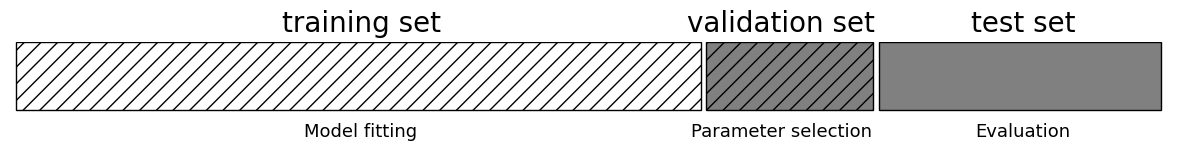

In [19]:
import mglearn
mglearn.plots.plot_threefold_split()

In [ ]:
For a given hyperparameter setting, learn the model parameters on training set
Minize the loss
Evaluate the trained model on the validation set
Tune the hyperparameters to maximize a certain metric (e.g. accuracy)


Model parameters and hyperparameter tuning are two important aspects of machine learning model development. They serve different purposes and are tuned in different ways:

Model Parameters:

Definition: Model parameters are the internal variables that the model learns from the training data. They are specific to the model architecture and are adjusted during the training process to make the model fit the data as well as possible. For example, in a linear regression model, the coefficients of the features are model parameters.

Automatic Tuning: Model parameters are automatically learned by the model during training. The goal is to minimize a loss function by adjusting these parameters.

Example: In a neural network, the weights and biases in each layer are model parameters. They are updated using backpropagation and optimization algorithms like stochastic gradient descent (SGD).

Hyperparameters:

Definition: Hyperparameters are settings or configurations that are set before training the model. They are not learned from the data but are chosen by the model developer. They control aspects of the training process and the model's architecture.

Manual Tuning: Hyperparameters are set manually or through a search process, and the goal is to find the best set of hyperparameters that leads to the best model performance.

Examples: Hyperparameters include the learning rate in optimization algorithms, the number of layers and neurons in a neural network, the depth of a decision tree, or the degree of a polynomial in polynomial regression.

The key distinction is that model parameters are learned from the data, while hyperparameters are set by the model developer. Tuning hyperparameters is an essential part of the machine learning process because it can significantly impact model performance. Hyperparameter tuning often involves techniques like grid search, random search, or more advanced optimization algorithms like Bayesian optimization.

To summarize, model parameters are learned by the model, while hyperparameters are set by the model developer, and tuning hyperparameters is a crucial step in optimizing the model's performance for a specific task or dataset.







###Better data representations, better models###


Algorithm needs to correctly transform the inputs to the right outputs
A lot depends on how we present the data to the algorithm
Transform data to better representation (a.k.a. encoding or embedding)
Can be done end-to-end (e.g. deep learning) or by first ‘preprocessing’ the data (e.g. feature selection/generation)


Feature engineering

Most machine learning techniques require humans to build a good representation of the data
Especially when data is naturally structured (e.g. table with meaningful columns)
Feature engineering is often still necessary to get the best results
Feature selection, dimensionality reduction, scaling, …
Applied machine learning is basically feature engineering (Andrew Ng)
Nothing beats domain knowledge (when available) to get a good representation
E.g. Iris data: leaf length/width separate the classes well


Learning data transformations end-to-end

For unstructured data (e.g. images, text), it’s hard to extract good features
Deep learning: learn your own representation (embedding) of the data
Through multiple layers of representation (e.g. layers of neurons)
Each layer transforms the data a bit, based on what reduces the error.

Certainly! Let's explore an example of using deep learning to learn end-to-end data transformations for unstructured data. In this case, we'll focus on image data and how convolutional neural networks (CNNs) learn hierarchical representations of images through multiple layers.

Example: Image Classification with Convolutional Neural Networks (CNNs)

In image classification tasks, CNNs can automatically learn meaningful features from raw pixel data, effectively transforming the data into a format that is suitable for classification. Here's how it works:

Input Data: Consider a dataset of images for a classification task. Each image is initially represented as a grid of pixel values.

Convolutional Layers: A CNN typically starts with one or more convolutional layers. These layers use small filters (also known as kernels) to slide across the input image, performing convolution operations. Each filter is responsible for detecting specific patterns or features, such as edges, corners, or textures. As the network learns, it adjusts the filter values to identify relevant features.

Pooling Layers: After convolutional layers, pooling layers are used to downsample the data. Max-pooling, for example, takes the maximum value in a small region, reducing the spatial dimensions. Pooling helps to make the network more robust to variations in object position or scale.

Flatten Layer: The output from the convolutional and pooling layers is typically flattened into a 1D vector. This step transforms the data into a format that is suitable for a fully connected neural network.

Fully Connected Layers: These are traditional neural network layers. They learn to combine the features extracted in the earlier layers to make classification decisions. The network learns the relationships between these features and their relevance to the task.

Output Layer: The final fully connected layer often consists of a softmax activation function to output class probabilities.

Training Process: During training, the CNN learns to adjust the filter weights and neural network parameters to minimize a loss function, which measures the difference between predicted and actual class labels. This process involves backpropagation and optimization techniques like stochastic gradient descent (SGD).

Hierarchical Representation: The CNN architecture allows for the learning of hierarchical representations. Early layers capture low-level features like edges and textures, while deeper layers learn high-level features and object parts. This hierarchy of features enables the network to recognize complex patterns and objects.

The key point is that the CNN learns these data transformations and feature representations directly from the raw image data. There's no need for manual feature extraction, making deep learning a powerful tool for handling unstructured data like images.

This concept can also be applied to other types of unstructured data, such as text data, where recurrent neural networks (RNNs) and more advanced models like Transformers are used to learn end-to-end representations from text sequences.
